In [1]:
# импорт библиотек

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Параметры задачи

В следующей ячейке я задаю параметры задачи. В данном случае задча выглядит так:
    
\begin{equation}
    y_i = f(x_i) + \varepsilon_i
    \\
    f(x) = 10 - 4 \cdot \sin(x) + 7 \cdot \cos(x)
    \\
    \varepsilon_i - независимы \ и \ одинаково \ распеределены \ с \ нулевым \ средним \ и дисперсией \ \sigma^2
\end{equation}

In [2]:
m = 3 # количество функций

a = np.array([10,-4,7]) # строка их коэффициентов в функции f(x)

sigma = 5 # дисперсия шума

# Функции f(x)

Теперь я объявляю каждую $f_i(x)$, а также формирую строку $F_x$

In [3]:
# f_i(x)

def f_0(x):
    return 1

def f_1(x):
    return np.sin(x)

def f_2(x):
    return np.cos(x)

# строка из функций

F = np.array([f_0, f_1, f_2])

Теперь я объявляю функцию $f(x) = F_x \cdot a$

In [4]:
# f(x)

def f(x,a):
    F_x = np.array([F[i](x) for i in range(F.shape[0])])
    return F_x @ a

# Функции для нахождения и обновления КИ

Теперь я объявляю функции, которые будут находить и обновлять каноническую информацию

In [5]:
# функция для нахождения канонической информации

def calc_CI(x,y):
    
    if x.shape != y.shape:
        return 'x and y must have same shapes'
    else:
        
        n = x.shape[0]
        V = np.sum([y_i**2 for y_i in y])
        
        v = np.zeros(F.shape[0])
        T = np.zeros((F.shape[0],F.shape[0]))
        
        for i in range(x.shape[0]):
            
            F_x_i = np.array([F[j](x[i]) for j in range(F.shape[0])])
            
            v_i = v_i = F_x_i * y[i]
            v = v + v_i
            
            T_i = F_x_i.reshape(-1,1) @ F_x_i.reshape(1,-1)
            T = T + T_i
            
        return n,V, v, T

In [6]:
def update_CI(r_1, r_2):
    return r_1[0] + r_2[0], r_1[1] + r_2[1], r_1[2] + r_2[2], r_1[3] + r_2[3]

# Функция для вычисления результата по канонической информации

Функция для вычисления результата по канонической информации будет возвращать две оценки - $\hat a$ и $\sqrt{\hat {D \hat {f(x)}}} = \hat{\sigma}$

In [7]:
def result(CI):
    
    a_est = np.linalg.inv(CI[3]) @ CI[2]
    
    D_est = (CI[1] - CI[2].reshape(1,-1) @ np.linalg.inv(CI[3]) @ CI[2])/(CI[0]-m)
    
    sigma_est = np.sqrt(D_est)
    
    return a_est, sigma_est[0]

Все готово для демонстрации работы кода. В задании требуется продемонстрировать 3 иллюстрации, показывающих оценки, для "малого", "среднего" и "большого" числа наблюдений.

Выберем такие количества наблюдений:

- 4 - малое количество наблюдений

- 20 - среднее количество наблюдений

- 200 - большое количество наблюдений

Так как код, осуществляющий случайное генерирование наблюдений, нахождение и обновление канонической информации требуют, а также построение графика, не зависит от количества наблюдений, я прокомментирую соответствующие ячейки только для малого количество наблюдений, а далее просто повторю его для среднего и большого

# Малое количество наблюдений

### Рандомное генерирование наблюдений

В следующей ячейче осуществляется случайное генерирование наблюдений по следующей схеме:

1. случайным образом генерируется значение **$x_i$** на отрезке $[0,5]$


2. по сгенерированному **$x_i$** находится **$y_i$**


3. оба значения сохраняются в список, для последующего построения графика (т.е. вообще говоря это необязательное действие, оно нужно только для того, чтобы нарисовать точки наблюдений на графике)


4. по сгенерированной паре **$(x_i, y_i)$** вычисляется элементарная информация

5. обновляем массив, хранящий каноническую информацию

In [8]:
x_arr = np.array([]) # массив для хранения наблюдений x

y_arr = np.array([]) # массив для хранения наблюдений y -> функция с шумом

CI_arr = np.array([0,0, np.array([0,0,0]), np.array([[0,0,0], [0,0,0], [0,0,0]])]) # массив для хранения канонической информации

for i in range(5):
    
    x_i = np.array([5*np.random.sample()]) # генерируем x_i из [0,5]
    
    y_i = np.array([f(x_i[0],a) + np.random.normal(loc=0, scale=sigma)]) # по x_i находим y_i
    
    x_arr = np.append(x_arr, x_i) # сохраняем x_i и y_i в соответствующие массивы, для построения графика
    y_arr = np.append(y_arr, y_i)
    
    elem_CI = calc_CI(x_i, y_i) # вычисляем элементарную каноническую информацию по паре (x_i, y_i)
    
    CI_arr = update_CI(CI_arr, elem_CI) # обновляем массив с канонической информацией

### Строим график

Теперь построим график

In [9]:
# массивы для отрисовки реальной функциональной зависимости

f_arr = np.array([f(x_i,a) for x_i in np.arange(0, 5, 0.01)])
f_x_arr = np.array([x_i for x_i in np.arange(0, 5, 0.01)])

По построенной канонической информации находим оценки - $\hat a$ и $\hat{\sigma}$

In [10]:
# находим оценки

a_est, sigma_est= result(calc_CI(x_arr, y_arr))

Теперь создадим массивы для отрисовки $\hat{f(x)}$, $\hat{f(x)} \pm \sigma$ и $\hat{f(x)} \pm \hat{\sigma}$

In [11]:
f_est_arr = np.array([f(x_i,a_est) for x_i in np.arange(0, 5, 0.01)]) # массив для отрисовки оценки f(x)

f_min_arr = np.array([f(x_i,a_est) - sigma for x_i in np.arange(0, 5, 0.01)]) # массивы для отрисовки коридора при известном сигма
f_max_arr = np.array([f(x_i,a_est) + sigma for x_i in np.arange(0, 5, 0.01)])

f_min_est_arr = np.array([f(x_i,a_est) - sigma_est for x_i in np.arange(0, 5, 0.01)]) # массивы для отрисовки коридора при неизвестном сигма
f_max_est_arr = np.array([f(x_i,a_est) + sigma_est for x_i in np.arange(0, 5, 0.01)])

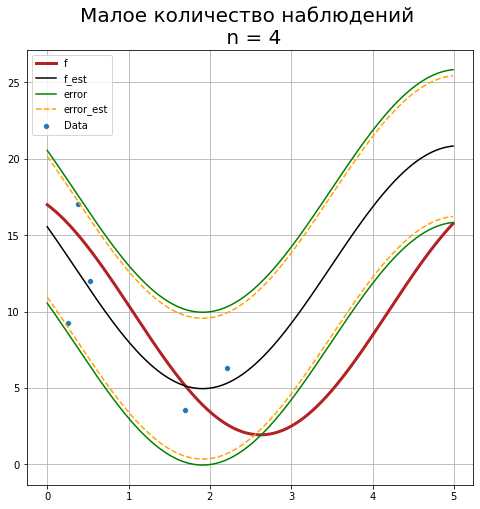

In [12]:
# строим график

fig, ax = plt.subplots(figsize=(8,8))

plt.plot(f_x_arr, f_arr, color='firebrick', linewidth=3, label = 'f') # реальная функция

sns.lineplot(x = f_x_arr, y = f_est_arr, color='black', ax=ax, label = 'f_est') # оценка функции

sns.lineplot(x = f_x_arr, y = f_min_arr, color='green', ax=ax, label = 'error') # коридор при известном сигма
sns.lineplot(x = f_x_arr, y = f_max_arr, color='green', ax=ax)

plt.plot(f_x_arr, f_min_est_arr, color='orange', linestyle='--', label = 'error_est') # коридор при неизвестном сигма
plt.plot(f_x_arr, f_max_est_arr, color='orange', linestyle='--')

sns.scatterplot(x = x_arr, y = y_arr, ax=ax, label= 'Data') # точки наблюдений
ax.grid()
ax.set_title(f'Малое количество наблюдений \n n = {4}', fontsize=20)
plt.show()

# Среднее количество наблюдений

In [13]:
x_arr = np.array([])

y_arr = np.array([])

CI_arr = np.array([0,0, np.array([0,0,0]), np.array([[0,0,0], [0,0,0], [0,0,0]])])

for i in range(21):
    
    x_i = np.array([5*np.random.sample()])
    
    y_i = np.array([f(x_i[0],a) + np.random.normal(loc=0, scale=sigma)])
    
    x_arr = np.append(x_arr, x_i)
    y_arr = np.append(y_arr, y_i)
    
    elem_CI = calc_CI(x_i, y_i)
    
    CI_arr = update_CI(CI_arr, elem_CI)

In [14]:
f_arr = np.array([f(x_i,a) for x_i in np.arange(0, 5, 0.01)])
f_x_arr = np.array([x_i for x_i in np.arange(0, 5, 0.01)])

In [15]:
a_est, sigma_est= result(calc_CI(x_arr, y_arr))

In [16]:
f_est_arr = np.array([f(x_i,a_est) for x_i in np.arange(0, 5, 0.01)])

f_min_arr = np.array([f(x_i,a_est) - sigma for x_i in np.arange(0, 5, 0.01)])
f_max_arr = np.array([f(x_i,a_est) + sigma for x_i in np.arange(0, 5, 0.01)])

f_min_est_arr = np.array([f(x_i,a_est) - sigma_est for x_i in np.arange(0, 5, 0.01)])
f_max_est_arr = np.array([f(x_i,a_est) + sigma_est for x_i in np.arange(0, 5, 0.01)])

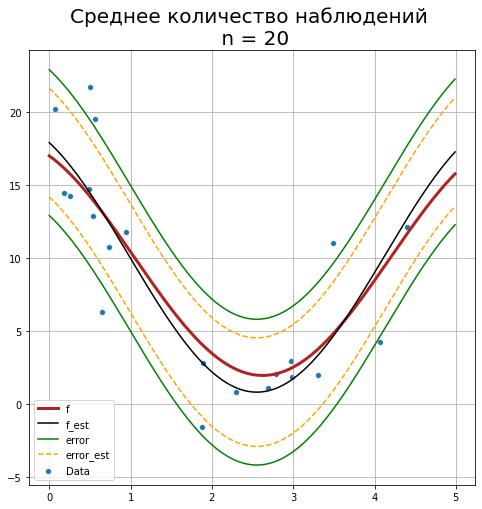

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(f_x_arr, f_arr, color='firebrick', linewidth=3, label = 'f')

sns.lineplot(x = f_x_arr, y = f_est_arr, color='black', ax=ax, label = 'f_est')

sns.lineplot(x = f_x_arr, y = f_min_arr, color='green', ax=ax, label = 'error')
sns.lineplot(x = f_x_arr, y = f_max_arr, color='green', ax=ax)

plt.plot(f_x_arr, f_min_est_arr, color='orange', linestyle='--', label = 'error_est')
plt.plot(f_x_arr, f_max_est_arr, color='orange', linestyle='--')

sns.scatterplot(x = x_arr, y = y_arr, ax=ax, label= 'Data')
ax.grid()
ax.set_title(f'Среднее количество наблюдений \n n = {20}', fontsize=20)
plt.show()

# Большое количество наблюдений

In [18]:
x_arr = np.array([])

y_arr = np.array([])

CI_arr = np.array([0,0, np.array([0,0,0]), np.array([[0,0,0], [0,0,0], [0,0,0]])])

for i in range(201):
    
    x_i = np.array([5*np.random.sample()])
    
    y_i = np.array([f(x_i[0],a) + np.random.normal(loc=0, scale=sigma)])
    
    x_arr = np.append(x_arr, x_i)
    y_arr = np.append(y_arr, y_i)
    
    elem_CI = calc_CI(x_i, y_i)
    
    CI_arr = update_CI(CI_arr, elem_CI)

In [19]:
f_arr = np.array([f(x_i,a) for x_i in np.arange(0, 5, 0.01)])
f_x_arr = np.array([x_i for x_i in np.arange(0, 5, 0.01)])

In [20]:
a_est, sigma_est= result(calc_CI(x_arr, y_arr))

In [21]:
f_est_arr = np.array([f(x_i,a_est) for x_i in np.arange(0, 5, 0.01)])

f_min_arr = np.array([f(x_i,a_est) - sigma for x_i in np.arange(0, 5, 0.01)])
f_max_arr = np.array([f(x_i,a_est) + sigma for x_i in np.arange(0, 5, 0.01)])

f_min_est_arr = np.array([f(x_i,a_est) - sigma_est for x_i in np.arange(0, 5, 0.01)])
f_max_est_arr = np.array([f(x_i,a_est) + sigma_est for x_i in np.arange(0, 5, 0.01)])

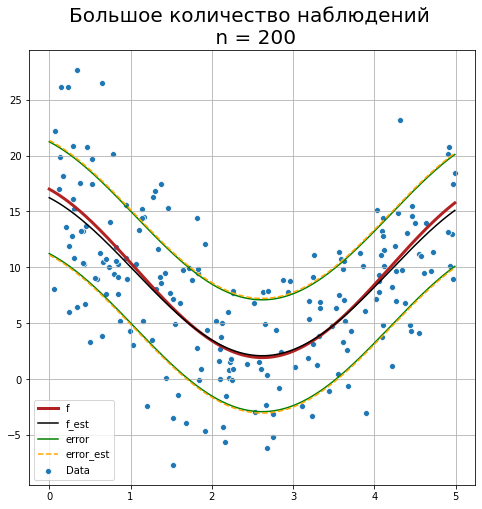

In [22]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(f_x_arr, f_arr, color='firebrick', linewidth=3, label = 'f')

sns.lineplot(x = f_x_arr, y = f_est_arr, color='black', ax=ax, label = 'f_est')

sns.lineplot(x = f_x_arr, y = f_min_arr, color='green', ax=ax, label = 'error')
sns.lineplot(x = f_x_arr, y = f_max_arr, color='green', ax=ax)

plt.plot(f_x_arr, f_min_est_arr, color='orange', linestyle='--', label = 'error_est')
plt.plot(f_x_arr, f_max_est_arr, color='orange', linestyle='--')

sns.scatterplot(x = x_arr, y = y_arr, ax=ax, label= 'Data')
ax.grid()
ax.set_title(f'Большое количество наблюдений \n n = {200}', fontsize=20)
plt.show()